<a href="https://colab.research.google.com/github/qurrata111/eksplorasi/blob/master/img_training_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x adalah gambar, y adalah label gambar

0


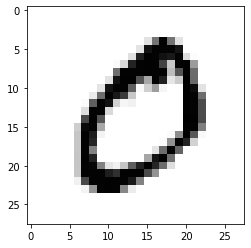

In [47]:
# salah satu gambar dari data set
import matplotlib.pyplot as plt
image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_train[0]
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0

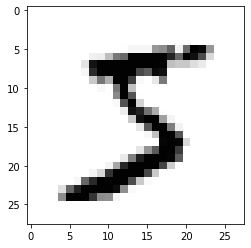

In [48]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_train[0]")
print(y_train[0])
print(x_train[0])
plt.imshow(x_train[0], cmap='Greys')

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [52]:
print("x_train shape setelah reshape: ", x_train.shape)

x_train shape setelah reshape:  (60000, 28, 28, 1)


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [54]:
# compiling and fitting model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.2190 - acc: 0.9332
Epoch 2/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0896 - acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0604 - acc: 0.9811
Epoch 4/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0457 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0356 - acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0287 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0242 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0217 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0179 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0174 - a

In [20]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 57us/step


[0.05679324295172009, 0.9865]

7


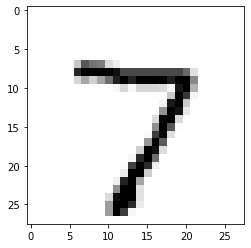

In [22]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
def test_image_training (test_image)